<a href="https://colab.research.google.com/github/YuvinMahwatta/Bank_Client_Prediction/blob/main/CM_2604_20230661_2330898Cw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Coursework

##Data Preproccesing

###Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Separate colmns in the dataset

In [2]:
file_path = 'bank-additional-full.csv'
df = pd.read_csv(file_path,delimiter=';')

new_file_path = 'bank_additional_new.csv'
df.to_csv(new_file_path, index=False)

print(f"New dataset saved as {new_file_path}")

New dataset saved as bank_additional_new.csv


###Importing the dataset

In [3]:
file_path = 'bank_additional_new.csv'
df = pd.read_csv(file_path)
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
16361,25,blue-collar,single,basic.9y,unknown,yes,no,cellular,jul,wed,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
34776,26,technician,single,professional.course,no,yes,no,cellular,may,thu,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
30225,81,retired,married,professional.course,no,yes,no,cellular,apr,thu,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.365,5099.1,no
9044,37,technician,married,professional.course,no,no,no,telephone,jun,thu,...,5,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
32041,41,technician,single,university.degree,no,yes,no,cellular,may,thu,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no


### Handling the duplicates

In [4]:
count = df.duplicated().sum()
print(f"Number of duplicates: {count}")

Number of duplicates: 12


In [5]:
if count > 0:
  duplicates = df[df.duplicated()]
  print(duplicates)

       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      no   no   
38281   71      retired    single    uni

In [6]:
df_clean = df.drop_duplicates()
print(f"Number of duplicates after cleaning: {df_clean.duplicated().sum()}")

Number of duplicates after cleaning: 0


###Removing unwanted columns

In [11]:
df = df_clean.drop('duration', axis=1)
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4438,41,blue-collar,married,basic.6y,no,no,no,telephone,may,tue,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
14547,30,blue-collar,single,basic.4y,no,yes,no,cellular,jul,tue,2,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
550,39,admin.,single,university.degree,no,no,no,telephone,may,tue,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
19258,32,technician,single,professional.course,no,yes,no,cellular,aug,wed,2,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,no
9071,44,services,married,high.school,no,yes,no,telephone,jun,thu,3,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no


### Checking and handeling outliers

### Checking outliers

In [13]:
import pandas as pd
import numpy as np


numerical_cols = df.select_dtypes(include=np.number).columns

outlier_counts = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

for col, count in outlier_counts.items():
    print(f"Number of outliers in {col}: {count}")

total_outliers = sum(outlier_counts.values())
print(f"\nTotal number of outliers across all numerical columns: {total_outliers}")

Number of outliers in age: 468
Number of outliers in campaign: 2406
Number of outliers in pdays: 1515
Number of outliers in previous: 5625
Number of outliers in emp.var.rate: 0
Number of outliers in cons.price.idx: 0
Number of outliers in cons.conf.idx: 446
Number of outliers in euribor3m: 0
Number of outliers in nr.employed: 0

Total number of outliers across all numerical columns: 10460


###Displaying the outliers in a plot

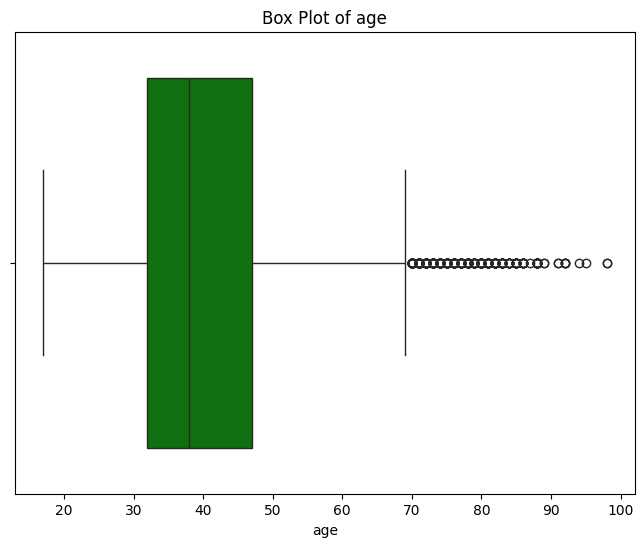

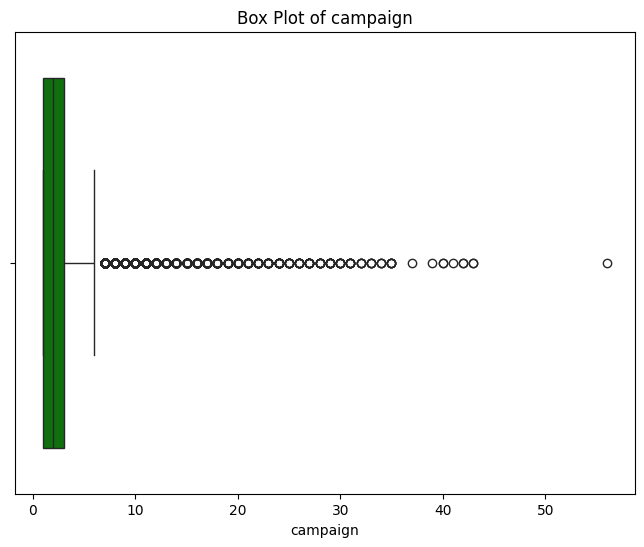

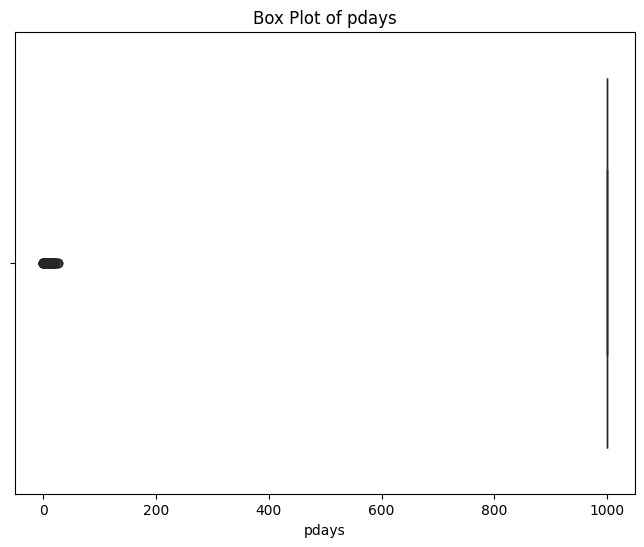

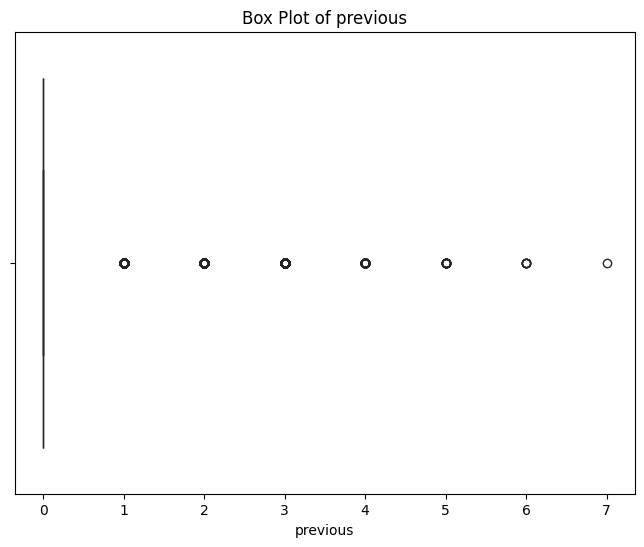

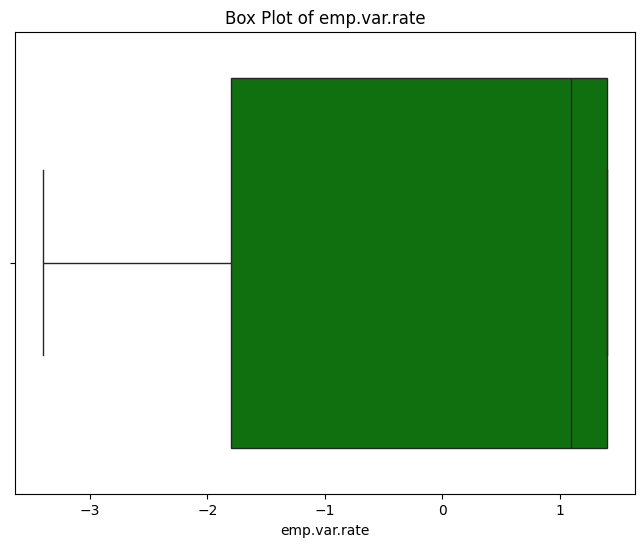

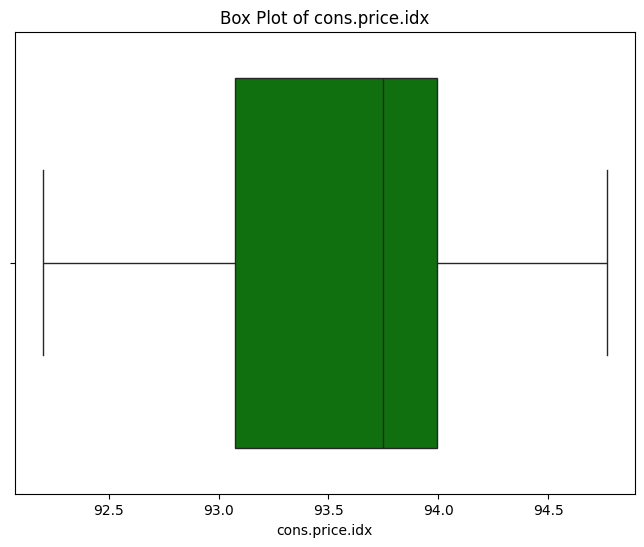

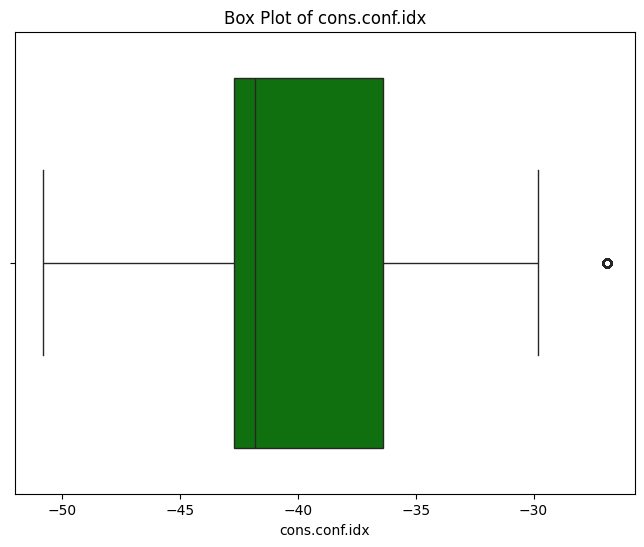

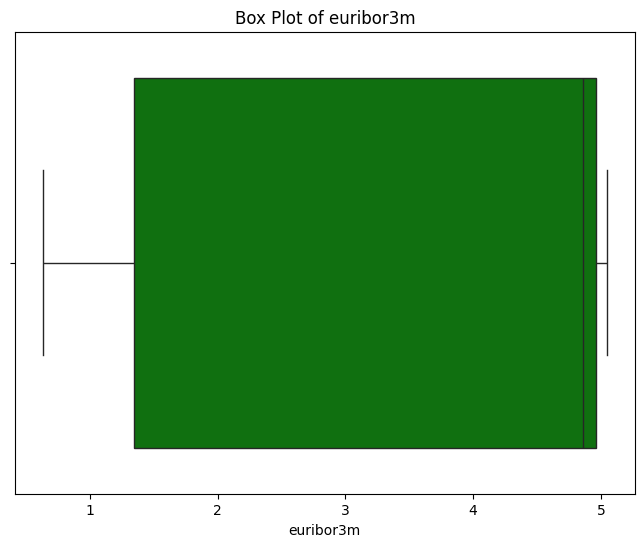

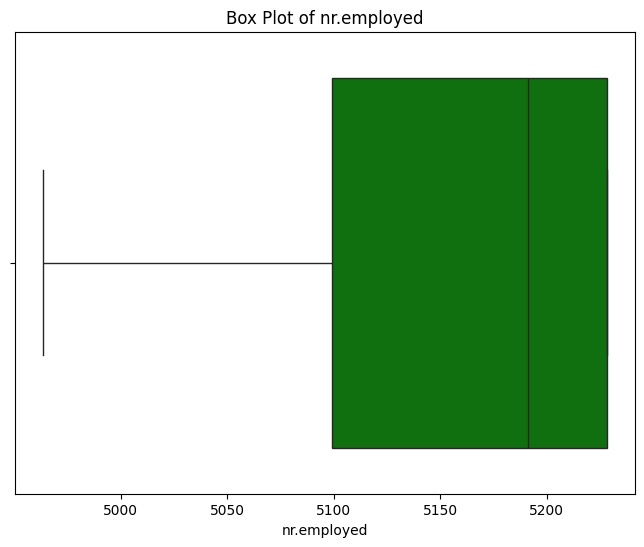

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col], color='green')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()